In [3]:
import pandas as pd
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
import re
%matplotlib inline

In [4]:
amazon_skills = pd.read_csv('../data/amazon_jobs_dataset.csv')
amazon_skills.tail()

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
3488,3488,Software Engineer,"US, NV, Las Vegas","August 29, 2012",What are you currently doing? We’re building a...,· 5+ years production Java software developmen...,· 7+ years Java software development in a prod...
3489,3489,Software Development Engineer,"US, WA, Seattle","April 23, 2012",At Amazon Voice and Advanced Natural Shopping ...,* Bachelor’s Degree in Computer Science or rel...,* Experience building complex software systems...
3490,3490,Software Development Engineer III - Mar. BR 2012,"US, WA, Seattle","March 6, 2012",Employer: Amazon Corporate LLCPosition: Softwa...,Basic Qualifications:Education: Master’s degre...,-
3491,3491,Software Development Engineer in Test II - IMM546,"US, WA, Seattle","November 28, 2011",POSITIONS AVAILABLECompany: Amazon Corporate L...,-,-
3492,3492,Software Development Engineer in Test,"US, WA, Seattle","July 7, 2011",Kindle and Amazon are impacting the world with...,"· Bachelor’s degree in Computer Science, Compu...",· Experience with open source tools and resour...


In [4]:
#t1 = pd.DataFrame(amazon_skills['PREFERRED QUALIFICATIONS'])
#t2 = pd.DataFrame(amazon_skills['BASIC QUALIFICATIONS'])
#t = [t1,t2]
#result=pd.concat(t,axis=1)
#result.head()

18


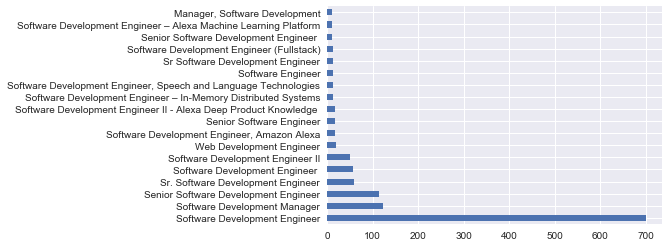

In [5]:
title_count = amazon_skills.Title.value_counts()
title = amazon_skills['Title']
new = title_count[title_count>9]
print(new.count())

new.plot(kind='barh')
#new.plot(kind='barh')
#uni_title = pd.DataFrame(amazon_skills['Title'].unique())


21


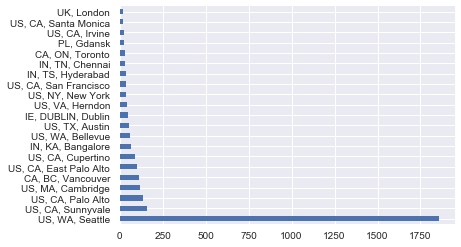

In [6]:
location_count = amazon_skills.location.value_counts()
loc_count=location_count[location_count>20]

print(loc_count.count())
loc_count.plot(kind='barh')
#print(location_count)
#tit
#plt.figure(figsize=(15,15))

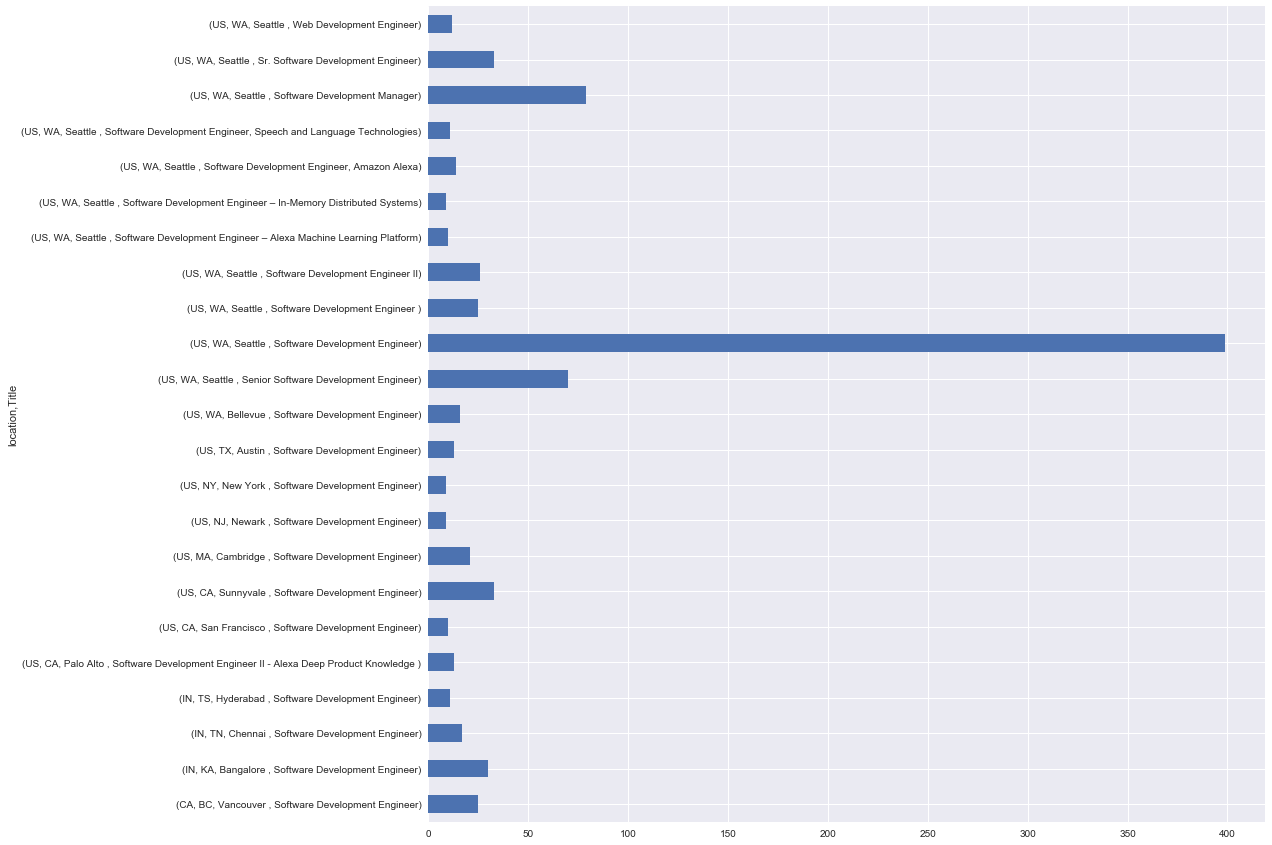

In [7]:
# Group by location counts of titles 
counts = amazon_skills.groupby(['location','Title']).size()
imp_counts = counts[counts>8]

plt.figure(figsize=(15,15))
imp_counts.plot(kind='barh')

<bound method Series.sort of 1     961
2     869
12    393
11    271
10    243
9     165
8     153
5     108
6      99
7      95
3      78
4      58
Name: month, dtype: int64>


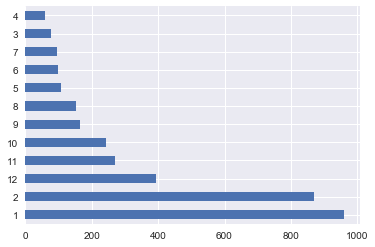

In [7]:
# Group by period of job posting - monthly posting counts
#Posting_date_count = amazon_skills.Posting_date.value_counts()
#print(Posting_date_count)
amazon_skills['year'] = pd.DatetimeIndex(amazon_skills['Posting_date']).year
amazon_skills['month'] = pd.DatetimeIndex(amazon_skills['Posting_date']).month
posting_month_count = amazon_skills['month'].value_counts()
print(posting_month_count.sort)

posting_month_count.plot(kind='barh')


* Looks like January is th month that experiences a high volume of job posting by Amazon (overall - between 2011 to 2018)

<bound method Series.sort of 2018    1710
2017    1614
2016     123
2015      29
2012       7
2014       5
2013       3
2011       2
Name: year, dtype: int64>


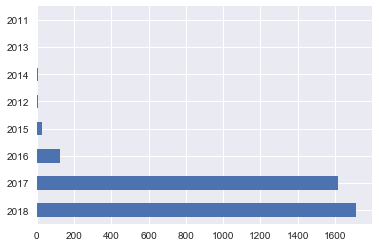

In [8]:
# Group by year counts of postings
amazon_skills['year'] = pd.DatetimeIndex(amazon_skills['Posting_date']).year
posting_year_count = amazon_skills['year'].value_counts()
print(posting_year_count.sort)

posting_year_count.plot(kind = 'barh')

* Looks like posting of jobs jumped up exponentially in the 2017 and is maximum in 2018

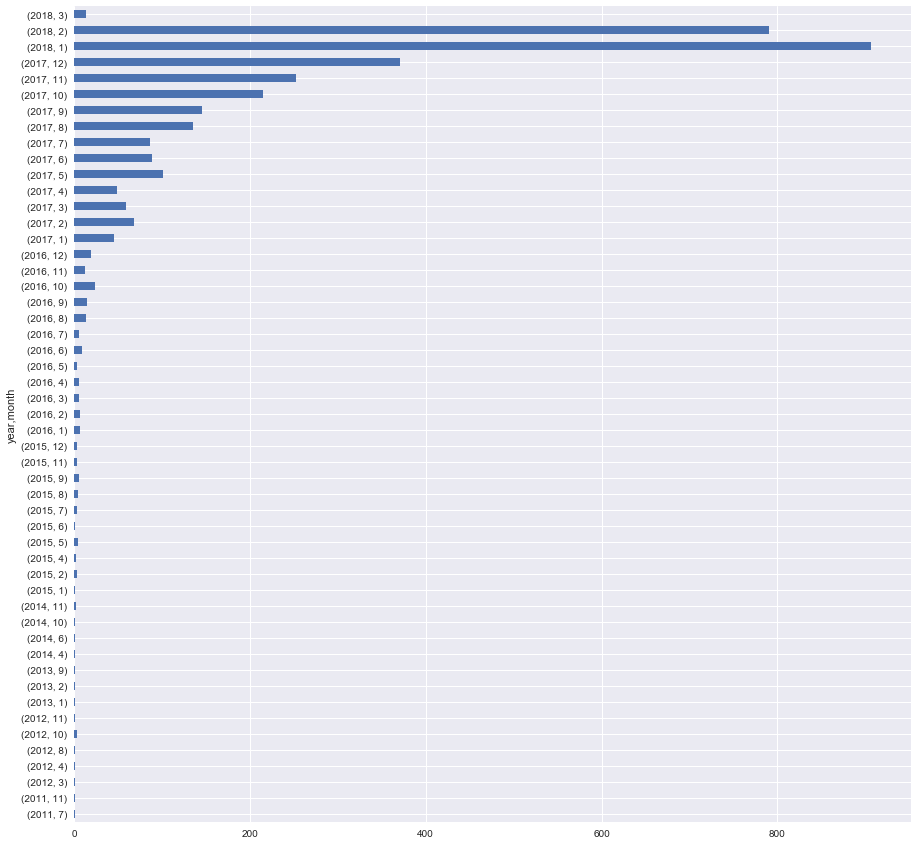

In [9]:
amazon_skills['year'] = pd.DatetimeIndex(amazon_skills['Posting_date']).year
amazon_skills['month'] = pd.DatetimeIndex(amazon_skills['Posting_date']).month
month_year_count = amazon_skills.groupby(['year','month']).size()
month_year_count.sort
plt.figure(figsize=(15,15))
month_year_count.plot(kind='barh')

* From the above plot, it is clear that from the third quarter of 2017, the number of job postings have drastically increased. Maybe has something to do with Alexa becoming more popular in USA? 


In [53]:
us_data = amazon_skills[amazon_skills.location.str.startswith('US')]
us_data = us_data.reset_index(drop=True)
us_data
copy_us_data = us_data
copy_us_data


,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS,year,month
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...,2018,3
1,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...,2018,3
2,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...,2018,3
3,5,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...,2018,3
4,6,Quality Assurance Engineer,"US, WA, Seattle","March 1, 2018",Fire TV client software and service technologi...,· 3+ years of software quality assurance engin...,"· BS degree, preferably in Computer Science, e...",2018,3
5,7,Software Development Engineer,"US, CA, Cupertino","March 1, 2018",The Amazon Devices team designs and engineers ...,"· Bachelor’s degree in Computer Science, Compu...","· Master’s degree in Computer Science, Compute...",2018,3
6,8,Software Development Engineer,"US, CA, Cupertino","March 1, 2018",The Amazon Devices team designs and engineers ...,"· Bachelor’s degree in Computer Science, Compu...","· Master’s degree in Computer Science, Compute...",2018,3
7,9,Software Development Manager - Amazon Cloud Cam,"US, CA, Cupertino","March 1, 2018",The Amazon Devices team designs and engineers ...,· Bachelor’s Degree in Computer Science or rel...,· Master’s degree in Computer Science or relat...,2018,3
8,10,Software Development Engineer – Alexa Machine ...,"US, WA, Seattle","March 1, 2018",Interested in Machine Learning? How about Amaz...,· BS/MS in Computer Science or equivalent· 2+ ...,· Experience developing cloud software service...,2018,3
9,11,Manager of Application Development and Enginee...,"US, WA, Seattle","March 1, 2018",Amazon is one of the largest employers on the ...,· Bachelors Degree and 10+ years of IT/softwar...,· Experience managing global teams and/or proj...,2018,3


In [54]:
# new dataframe called title_location_bQualification
title_location_bQualification = us_data[['Title', 'location', 'BASIC QUALIFICATIONS']]
title_location_bQualification.reset_index(drop=True)
title_location_bQualification.head(5)

#title_location_bQualification.shape

,Title,location,BASIC QUALIFICATIONS
0,Software Development Manager,"US, WA, Seattle",· Proven track record of hiring and managing h...
1,Software Development Engineer - Amazon Lex,"US, WA, Seattle",· Bachelors Degree in Computer Science or a re...
2,Software Development Engineer - Amazon Lex,"US, WA, Seattle",· Bachelors Degree in Computer Science or a re...
3,Software Development Engineer - Amazon Lex,"US, WA, Seattle",· Bachelors Degree in Computer Science or a re...
4,Quality Assurance Engineer,"US, WA, Seattle",· 3+ years of software quality assurance engin...


*Cleaning Corpus

In [55]:
#NLP (Natural Language Processing)
import re #regex
import nltk #natural language toolkit
import string #punctuation

from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

In [56]:
lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()
eng_stopwords = set(stopwords.words("english"))

In [81]:
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

def clean(qual):
        #This function will take qualifications and returna valid word list
        
        #qual = qual.lower() #Converts to lowercase
        if type(qual) is str:
            qual= qual.lower()
        qual = re.sub("\\n"," ",str(qual)) #Removes newline
        
        words = tokenizer.tokenize(qual)
        words = [APPO[word] if word in APPO else word for word in words]
        words = [lem.lemmatize(word) for word in words]
        words = [w for w in words if not w in eng_stopwords]
        
        clean_qual = " ".join(words)
        return(clean_qual)
    

In [85]:
corpus = us_data['BASIC QUALIFICATIONS']
corpus.head()

0    · Proven track record of hiring and managing h...
1    · Bachelors Degree in Computer Science or a re...
2    · Bachelors Degree in Computer Science or a re...
3    · Bachelors Degree in Computer Science or a re...
4    · 3+ years of software quality assurance engin...
Name: BASIC QUALIFICATIONS, dtype: object

In [86]:
clean_corpus=corpus.apply(lambda x :clean(x)) 
clean_corpus.head()

0    · proven track record hiring managing high per...
1    · bachelor degree computer science related fie...
2    · bachelor degree computer science related fie...
3    · bachelor degree computer science related fie...
4    · 3 + year software quality assurance engineer...
Name: BASIC QUALIFICATIONS, dtype: object

## Feature Selection